In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("churn dataset.csv")
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


# Basic Information

In [3]:
import io
def about_df(df):
    # Sample view
    df_sample = df.sample(10)
    
    # Get size
    size = df.shape[0]
    
    # Get info (this will print info and not return it, so we capture it separately)
    buffer = io.StringIO()
    df.info(buf=buffer)
    info = buffer.getvalue()

    # Get column names and types
    columns = df.dtypes
    
    # Get missing values
    missing_values = df.isnull().sum()
    
    # Get statistics for numerical columns
    stats = df.describe(include='all')  # Include 'all' to get stats for non-numerical columns as well
    
    return df_sample, size, info, columns, missing_values, stats


# Get DataFrame information
df_sample, size, info, columns, missing_values, stats = about_df(df)

# Print the results
print('DataFrame Sample:')
print(df_sample)
print('\nDataFrame Size:', size)
print('\nDataFrame Info:')
print(info)
print('\nColumn Names and Types:')
print(columns)
print('\nMissing Values:')
print(missing_values)
print('\nStatistics:')
print(stats)


DataFrame Sample:
        CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
351413    358528.0  36.0  Female    44.0             14.0            2.0   
430503    437618.0  33.0    Male    31.0              8.0            1.0   
132389    136745.0  63.0  Female     2.0              5.0            3.0   
163010    167821.0  54.0    Male    21.0             26.0            7.0   
153682    158493.0  41.0    Male    14.0             29.0            5.0   
102433    105509.0  23.0  Female    57.0             25.0            4.0   
220040    225737.0  42.0    Male    13.0              2.0            5.0   
34794      34926.0  63.0    Male    31.0             28.0            6.0   
20690      20699.0  34.0    Male    32.0              5.0            3.0   
225096    231003.0  57.0    Male    22.0              8.0           10.0   

        Payment Delay Subscription Type Contract Length  Total Spend  \
351413           14.0             Basic          Annual       778.06   
4

# Basic Statistic About Dataset

In [5]:
def customer_statistics(df):
    # Calculate the relevant statistics
    average_age = df.iloc[:, 1].mean()
    average_tenure = df.iloc[:, 3].mean()
    total_spend = df.iloc[:, 9].sum()
    average_support_calls = df.iloc[:, 5].mean()
    churn_rate = df.iloc[:, 11].mean() * 100
    payment_delay_std_dev = df.iloc[:, 6].std()
    
    # Create a dictionary to store the statistics
    statistics = {
        'Average Age': average_age,
        'Average Tenure': average_tenure,
        'Total Spend': total_spend,
        'Average Support Calls': average_support_calls,
        'Churn Rate (%)': churn_rate,
        'Payment Delay Std Dev': payment_delay_std_dev
    }
    
    return statistics

In [6]:
# Get the statistics
stats = customer_statistics(df)

# Print the statistics
for key, value in stats.items():
    print(f'{key}: {round(value,2)}')

Average Age: 39.37
Average Tenure: 31.26
Total Spend: 278436642.72
Average Support Calls: 3.6
Churn Rate (%): 56.71
Payment Delay Std Dev: 8.26


# Customer Future Insights

Python function that returns six future insights based on the provided customer data, we can focus on predictive metrics and trends that might indicate future behavior or areas of potential concern. These insights could include expected churn, projected total spend, trends in customer behavior, etc.

In [7]:
import pandas as pd

def future_insights(df):
    # 1. Projected Total Spend for next year assuming similar behavior
    average_monthly_spend = df.iloc[:, 9].mean()
    projected_total_spend_next_year = average_monthly_spend * 12 * len(df)
    
    # 2. Churn Prediction: If churn rate remains the same, expected churn next year
    churn_rate = df.iloc[:, 11].mean()
    projected_churn_next_year = churn_rate * len(df)
    
    # 3. Increase in Support Calls: Predict next year's average support calls if trend continues
    average_support_calls = df.iloc[:, 5].mean()
    projected_support_calls_increase = average_support_calls * 1.1  # Assuming a 10% increase
    
    # 4. Payment Delay Trend: If delay continues to increase, predict future average delay
    average_payment_delay = df.iloc[:, 6].mean()
    projected_payment_delay_increase = average_payment_delay * 1.05  # Assuming a 5% increase
    
    # 5. Subscription Upgrades: Estimate the number of customers who might upgrade their subscription
    standard_and_basic_users = df[(df.iloc[:, 7] == 'Standard') | (df.iloc[:, 7] == 'Basic')]
    projected_upgrades = len(standard_and_basic_users) * 0.15  # Assuming 15% might upgrade
    
    # 6. Tenure Growth: Estimate how much tenure might increase if retention strategies are improved
    average_tenure = df.iloc[:, 3].mean()
    projected_tenure_growth = average_tenure * 1.2  # Assuming a 20% improvement in retention
    
    # Create a dictionary to store the future insights
    insights = {
        'Projected Total Spend Next Year': projected_total_spend_next_year,
        'Projected Churn Next Year': projected_churn_next_year,
        'Projected Support Calls Increase': projected_support_calls_increase,
        'Projected Payment Delay Increase': projected_payment_delay_increase,
        'Projected Subscription Upgrades': projected_upgrades,
        'Projected Tenure Growth': projected_tenure_growth
    }
    
    return insights

# Example usage

# Get the future insights
future_stats = future_insights(df)

# Print the future insights
for key, value in future_stats.items():
    print(f'{key}: {value}')


Projected Total Spend Next Year: 3341247292.0346737
Projected Churn Next Year: 249999.56710719728
Projected Support Calls Increase: 3.964880271849594
Projected Payment Delay Increase: 13.61400771722561
Projected Subscription Upgrades: 43823.1
Projected Tenure Growth: 37.50760289634146


# Dashboard (Graphs and Plots Analysis)

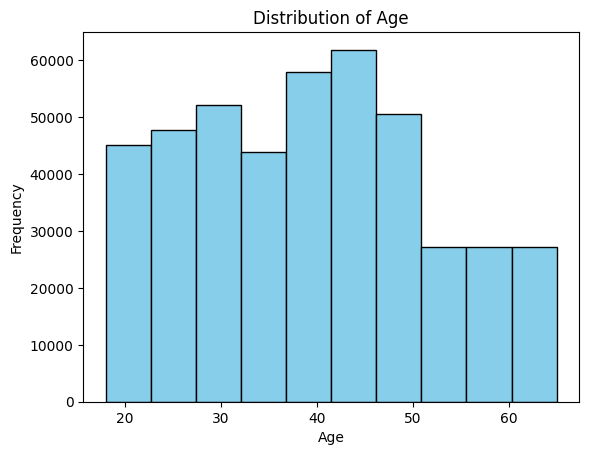

In [8]:
# Distribution of Age:
import matplotlib.pyplot as plt

def age_distribution_graph(df):
    df['Age'].plot(kind='hist', bins=10, color='skyblue', edgecolor='black')
    plt.title('Distribution of Age')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()

age_distribution_graph(df)

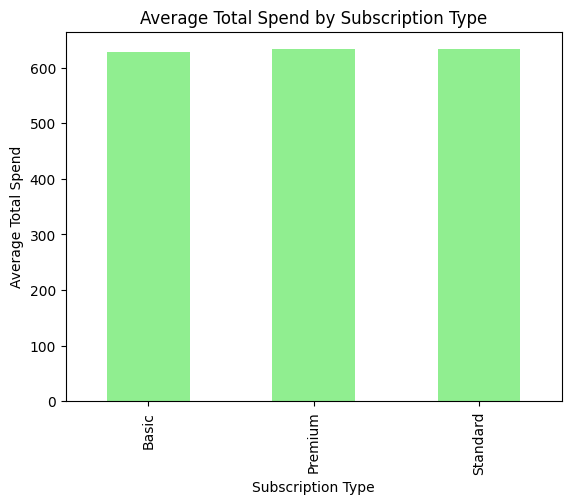

In [9]:
# Average Total Spend by Subscription Type:
def avg_total_spend_subscription_type(df):
    df.groupby('Subscription Type')['Total Spend'].mean().plot(kind='bar', color='lightgreen')
    plt.title('Average Total Spend by Subscription Type')
    plt.xlabel('Subscription Type')
    plt.ylabel('Average Total Spend')
    plt.show()

avg_total_spend_subscription_type(df)

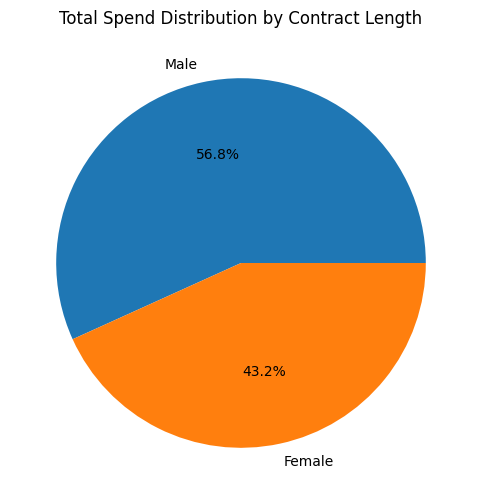

In [10]:
# Gender Distribtion:
def Gender_distribution(df):
    plt.figure(figsize=(10,6))
    df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title('Total Spend Distribution by Contract Length')
    plt.ylabel('')
    plt.show()

Gender_distribution(df)

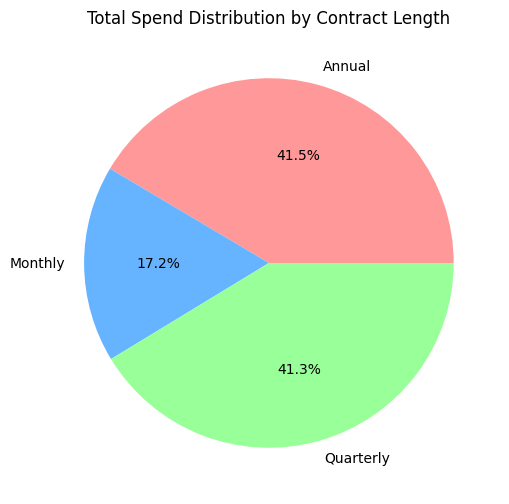

In [11]:
# Total Spend Distribution by Contract Length:
def Distribution_Total_spend_by_contact_length(df):
    plt.figure(figsize=(10,6))
    df.groupby('Contract Length')['Total Spend'].sum().plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
    plt.title('Total Spend Distribution by Contract Length')
    plt.ylabel('')
    plt.show()

Distribution_Total_spend_by_contact_length(df)

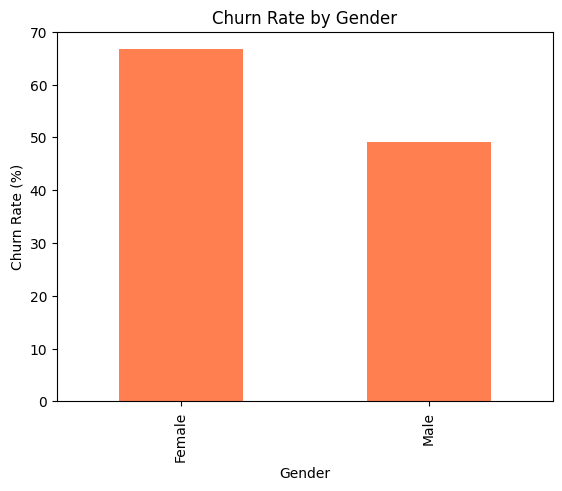

In [12]:
# Churn by Gedner

def churn_rate_by_gender(df):
    churn_rate_by_gender = df.groupby('Gender')['Churn'].mean() * 100
    churn_rate_by_gender.plot(kind='bar', color='coral')
    plt.title('Churn Rate by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Churn Rate (%)')
    plt.show()

churn_rate_by_gender(df)

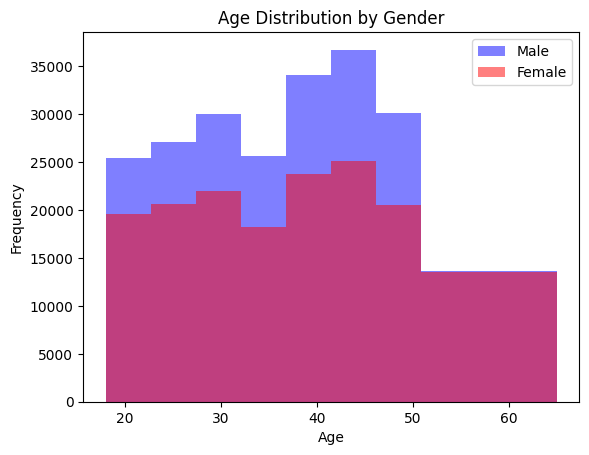

In [13]:
# Age Distribution by Gender:

def Age_distribution_by_gender(df):
    df[df['Gender'] == 'Male']['Age'].plot(kind='hist', bins=10, alpha=0.5, color='blue', label='Male')
    df[df['Gender'] == 'Female']['Age'].plot(kind='hist', bins=10, alpha=0.5, color='red', label='Female')
    plt.title('Age Distribution by Gender')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

Age_distribution_by_gender(df)